<a href="https://colab.research.google.com/github/FatimaElsaadny/DetectFaceLandMarks/blob/main/Face_Landmarks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade imutils

In [1]:
from google.colab.patches import cv2_imshow
import cv2
import os

# import the necessary packages
from matplotlib import pyplot as plt
from imutils import face_utils
import numpy as np
import argparse
import imutils
import dlib
from google.colab.patches import cv2_imshow

In [21]:
FOLDER_PATH= "/content/drive/MyDrive/Colab Notebooks/Face_pose_detection/facial-landmarks/images"
DAT_FILE_PATH = "/content/drive/MyDrive/Colab Notebooks/Face_pose_detection/facial-landmarks/shape_predictor_68_face_landmarks.dat"

IMG_PATH ="/content/drive/MyDrive/Colab Notebooks/babyface2.jpeg"

# Read content of a specific folder

In [22]:
def read_folder_content(folder_path):
  
  """ 
    a Function to Read the image_file_names in a specific folder given by a path

    -Input: Folder_path

    -Output: return list of files name
  """
  return os.listdir(folder_path)
  

# Read and Display Image

In [23]:
def img_display(photo):

  """
    Function to dispaly image using OpenCv

    -Input: image_file_name

    -Output: return displayed photo
  """
  # FOLDER_PATH+'/'+
  img = cv2.imread(photo, cv2.IMREAD_UNCHANGED)
  return cv2_imshow(img)

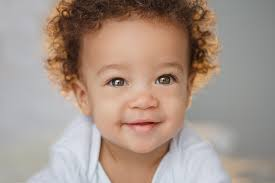

In [24]:
img_display(IMG_PATH)

In [25]:
def get_gray_scale(image):
  """
    Function to load the input image, resize it, and convert it to grayscale

    -Input: image to be converted

    -Output: image converted to gray_scale
  """

  image = cv2.imread(image)
  image = imutils.resize(image, width=500)
  return image, cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


In [26]:
def face_landmark_predict1(photo_path):
  """ 
    Function to predict Face landMarks Using Dlib's  face detector (HOG-based) and opencv.

    -Input : path of the photo which you want to detect face landmarks of it
    _Output: 1) return numpy array of (68,2) land marks
             2) image with face landmarks
  """

  # initialize dlib's face detector (HOG-based) and then create
  # the facial landmark predictor
  detector = dlib.get_frontal_face_detector()
  dlib_landmarks_predictor = dlib.shape_predictor(DAT_FILE_PATH)

  image, gray = get_gray_scale(photo_path)

  # detect faces in the grayscale image
  rects = detector(gray, 1)

    # loop over the face detections
  for (i, rect) in enumerate(rects):
    # determine the facial landmarks for the face region, then
    # convert the facial landmark (x, y)-coordinates to a NumPy
    # array
    face_landmarks = dlib_landmarks_predictor(gray, rect)
    shape = face_utils.shape_to_np(face_landmarks)

    # convert dlib's rectangle to a OpenCV-style bounding box
    # [i.e., (x, y, w, h)], then draw the face bounding box
    (x, y, w, h) = face_utils.rect_to_bb(rect)
    # cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # show the face number
    cv2.putText(image, "".format(i + 1), (x - 10, y - 10),
      cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # loop over the (x, y)-coordinates for the facial landmarks
    # and draw them on the image
    for (x, y) in shape:
      cv2.circle(image, (x, y), 1, (0, 0, 255), -1)
  return  face_utils.shape_to_np(face_landmarks), image

In [27]:

arr, image = face_landmark_predict1(IMG_PATH)

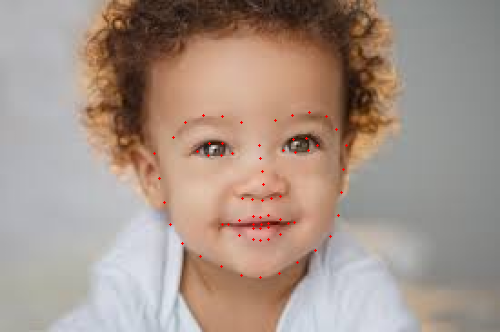

In [28]:
cv2_imshow(image)